#Loading MNIST Data

In [ ]:
import plot_tools 
import mnist_tools

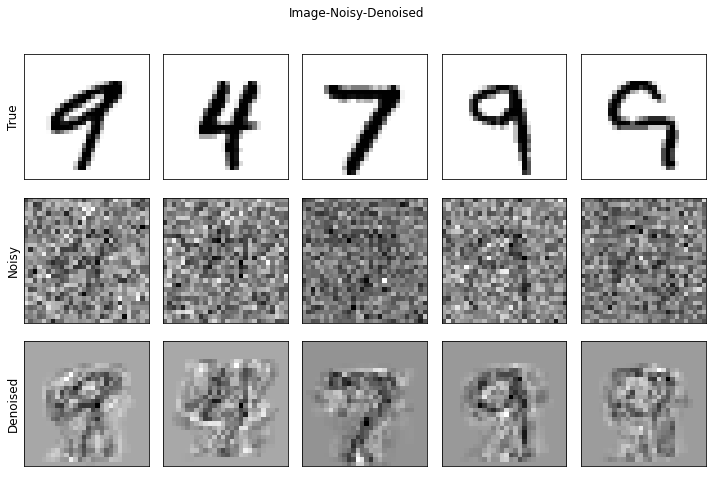

In [2]:
"""
Tools for loading the MNIST Data.

@author: Brett
"""

import numpy as np
import scipy as sp
from mnist_tools import *
from plot_tools import *

"""
Given a 2-dimensional numpy array trainImages of 
training images with shape (n,d)
(each row is an image), denoise the given noisyImage by orthogonally 
projecting it onto the row space of trainImages.
"""

def denoise(trainImages, noisyImage) :
  
    #Your code here

    #Center, use svd, then dot product

    trainImages = (trainImages - np.mean(trainImages)) 
    U, s, V = np.linalg.svd(trainImages, full_matrices=False)
    return np.dot(np.dot(V.T,V), noisyImage)

    
  

    


# def denoise_nn(trainImages, noisyImage) :
#     #Your code here

#     #Keeping a list of norms
#     norm_list = []

#     for i in range((trainImages.shape[0])):
#       norm = np.linalg.norm(noisyImage - trainImages[i],ord=2) #Calculating L2 norm
#       norm_list.append(norm)
#       min_index = norm_list.index(min(norm_list)) #Returns the index of the minimum of the norm list so we know the index of the trainImages
      
#     return trainImages[min_index]
      

"""
Assumes the data file is in 'mnist_all.mat'.
"""
def main() :
    datafile = "/content/mnist_all.mat" #Change if you put the file in a different path
    train = load_train_data(datafile)
    test,noisyTest,testLabels = load_noisy_test_data(datafile)
    imgs = []
    for i in range(len(testLabels)) :
        trueDigit = testLabels[i]
        testImage = test[i,:]
        noisyImage = noisyTest[i,:]
        denoisedImage = denoise(train[trueDigit],noisyImage)
        imgs.extend([testImage,noisyImage,denoisedImage])
    plot_image_grid(imgs,
                    "Image-Noisy-Denoised",
                    (28,28),len(testLabels),3,True,row_titles=['True','Noisy','Denoised'])

if __name__ == "__main__" :
    main()